In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [13]:
data = pd.read_csv('data/Signal_breast datasets.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
drop_columns = ['id', 'Unnamed: 32']
data.drop(columns=drop_columns, inplace=True)

Text(0.5, 1.0, 'diagnosis counts distributed')

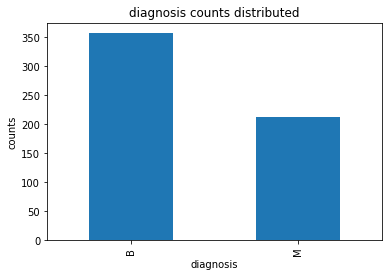

In [16]:
data['diagnosis'].value_counts().plot(kind='bar')
plt.xlabel("diagnosis")
plt.ylabel("counts")
plt.title("diagnosis counts distributed")

# Question 1 - 特徵相關性

In [17]:
data.drop('diagnosis', axis=1).corr().style.background_gradient(cmap='coolwarm')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


# Questeion 2 - top5 feature

In [47]:
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

rf_model = RandomForestClassifier(n_estimators=150, random_state=16)
rf_model.fit(x, y)
most_importants = rf_model.feature_importances_
most_importants
most_importants_keys = np.argsort(most_importants)[::-1]

top_n = 5
features = []
print(f"top {top_n} feature")
for i in range(top_n):
    feature_name = x.columns[most_importants_keys[i]]
    feature_value = most_importants[most_importants_keys[i]]
    
    features.append(feature_name)
    print(f"{i+1}\t{feature_name}\t{feature_value}")

top 5 feature
1	perimeter_worst	0.14084428228682433
2	concave points_worst	0.12364860825029939
3	concave points_mean	0.11037476467363284
4	radius_worst	0.10697960011948948
5	area_worst	0.09216712158556566


# Question 3-4

In [53]:
x = data.drop('diagnosis', axis=1)[features]
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 150, 200],
    
}
rf_model = RandomForestClassifier(random_state=16)
grid_cv = GridSearchCV(rf_model, hyperparameters)
grid_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=16),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200]})

In [55]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101678,0.001272,0.008120,0.000251,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.941860,0.964706,0.917647,0.952941,0.917647,0.938960,0.018843,1
1,0.151810,0.000900,0.011988,0.000320,gini,150,"{'criterion': 'gini', 'n_estimators': 150}",0.930233,0.964706,0.917647,0.941176,0.929412,0.936635,0.015889,3
2,0.203631,0.003287,0.015069,0.000647,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.941860,0.964706,0.917647,0.941176,0.929412,0.938960,0.015631,1
3,0.109456,0.001964,0.008720,0.000350,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.941860,0.964706,0.917647,0.929412,0.929412,0.936607,0.016001,4
4,0.159470,0.002059,0.011487,0.000396,entropy,150,"{'criterion': 'entropy', 'n_estimators': 150}",0.941860,0.964706,0.917647,0.929412,0.929412,0.936607,0.016001,4
5,0.211254,0.002064,0.014996,0.000074,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.941860,0.964706,0.917647,0.929412,0.929412,0.936607,0.016001,4
